In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
DATE = '080125'

In [3]:
def save_background_image(SAS, img_file_idx, bkg_file_idx, save_profiles=False):
    image = Image.open(f'../csu_data/SAS_{SAS}/{DATE}/test_{img_file_idx:04d}.tif')
    bkg_image = Image.open(f'../csu_data/SAS_{SAS}/{DATE}/test_{bkg_file_idx:04d}.tif')
    
    arr = np.array(image)
    assert arr.dtype == np.uint8, "8 bit unsigned integer expected"
    
    bkg_arr = np.array(bkg_image)
    assert bkg_arr.dtype == np.uint8, "8 bit unsigned integer expected"

    os.makedirs(f'out/SAS_{SAS}/{DATE}', exist_ok=True)
    
    diff = np.clip(np.array(image) - np.array(bkg_image), 0, 255).astype(np.uint8)
    diff = 255 - diff
    plt.figure()
    plt.imshow(diff, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.savefig(f'out/SAS_{SAS}/{DATE}/test_{img_file_idx:04d}_subtracted.png')

    if save_profiles:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
        profile = np.mean(diff, axis=0)
        ax1.plot(profile)
        ax1.grid('on')
        ax1.set_title(f'Horizontal Profile for SAS_{SAS}/{DATE}/test_{img_file_idx:04d}')
        profile = np.mean(diff, axis=1)
        ax2.plot(profile)
        ax2.grid('on')
        ax2.set_title(f'Vertical Profile for SAS_{SAS}/{DATE}/test_{img_file_idx:04d}')
        plt.savefig(f'out/SAS_{SAS}/{DATE}/test_{img_file_idx:04d}_profiles.png')
    
    return arr, bkg_arr, diff

(array([[141, 107, 110, ..., 113, 114, 112],
        [114, 118, 105, ..., 113, 111, 114],
        [104, 113, 108, ..., 104, 113, 110],
        ...,
        [108,  95, 108, ..., 127, 130, 132],
        [115,  99, 131, ..., 132, 128, 132],
        [130, 105, 126, ..., 159, 171, 138]], dtype=uint8),
 array([[134, 107, 112, ..., 111, 111, 107],
        [110,  83, 116, ..., 108, 106, 106],
        [109, 111, 116, ..., 115, 113, 113],
        ...,
        [ 88, 102, 107, ..., 127, 127, 126],
        [106,  90, 139, ..., 130, 122, 134],
        [132,  96, 125, ..., 152, 169, 134]], dtype=uint8),
 array([[248, 255,   1, ..., 253, 252, 250],
        [251, 220,  10, ..., 250, 250, 247],
        [  4, 253,   7, ...,  10, 255,   2],
        ...,
        [235,   6, 254, ..., 255, 252, 249],
        [246, 246,   7, ..., 253, 249,   1],
        [  1, 246, 254, ..., 248, 253, 251]], dtype=uint8))

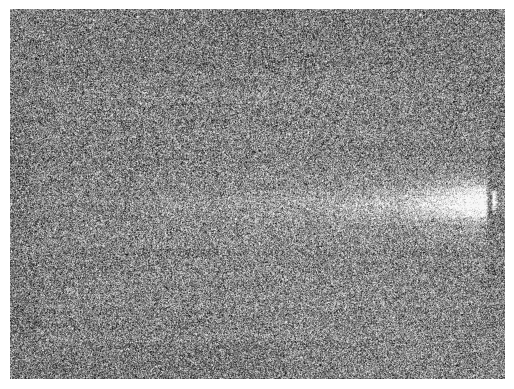

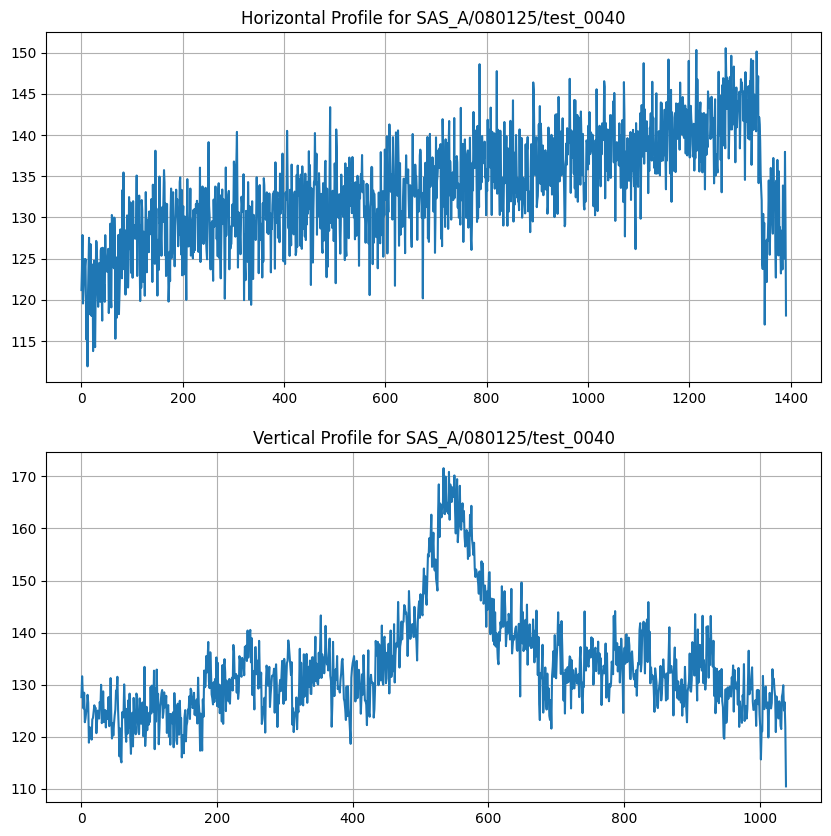

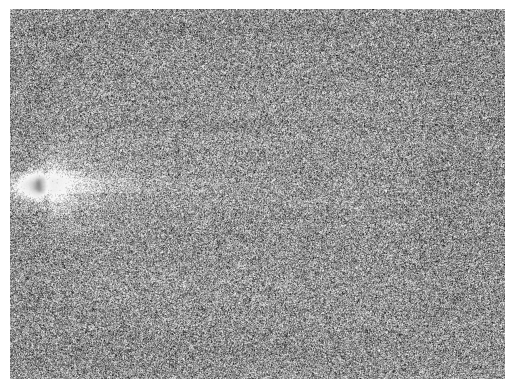

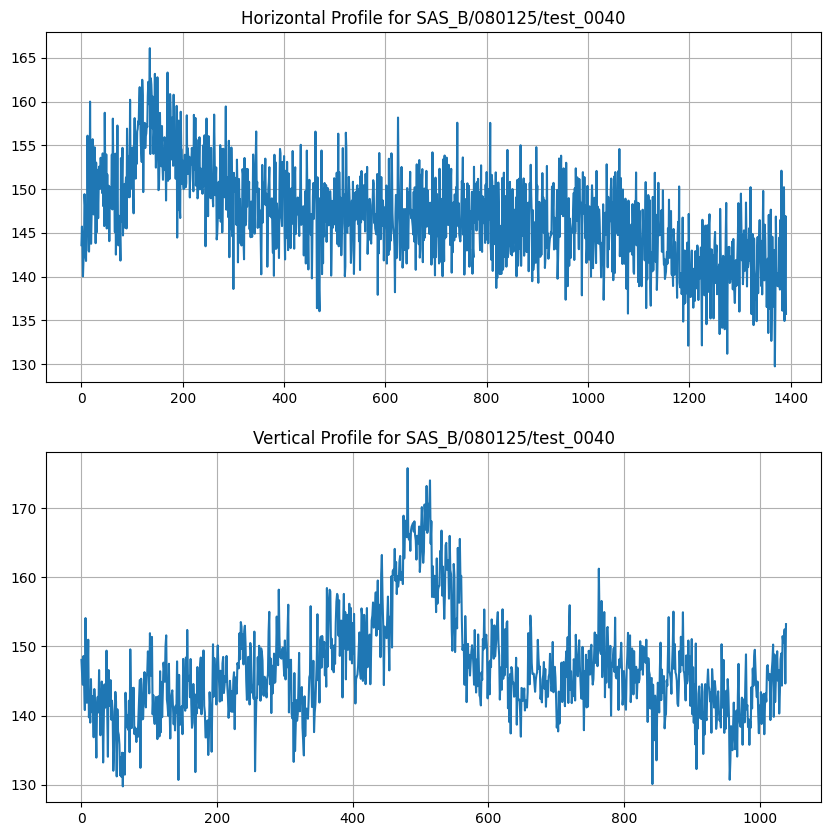

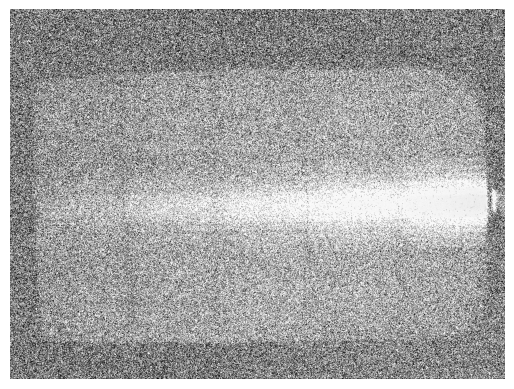

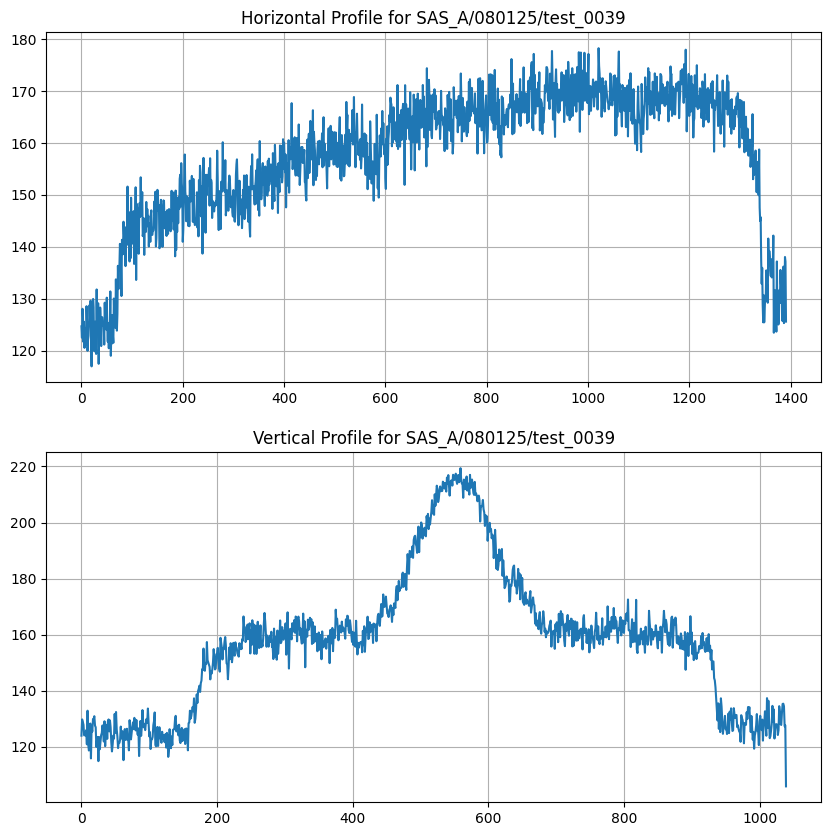

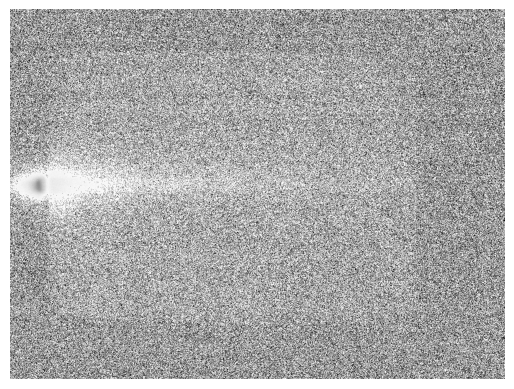

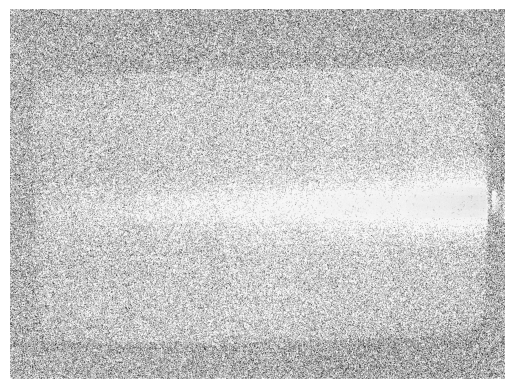

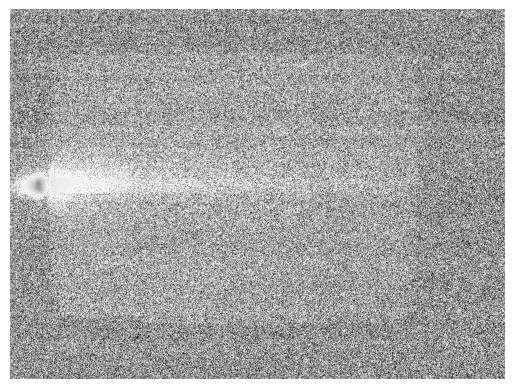

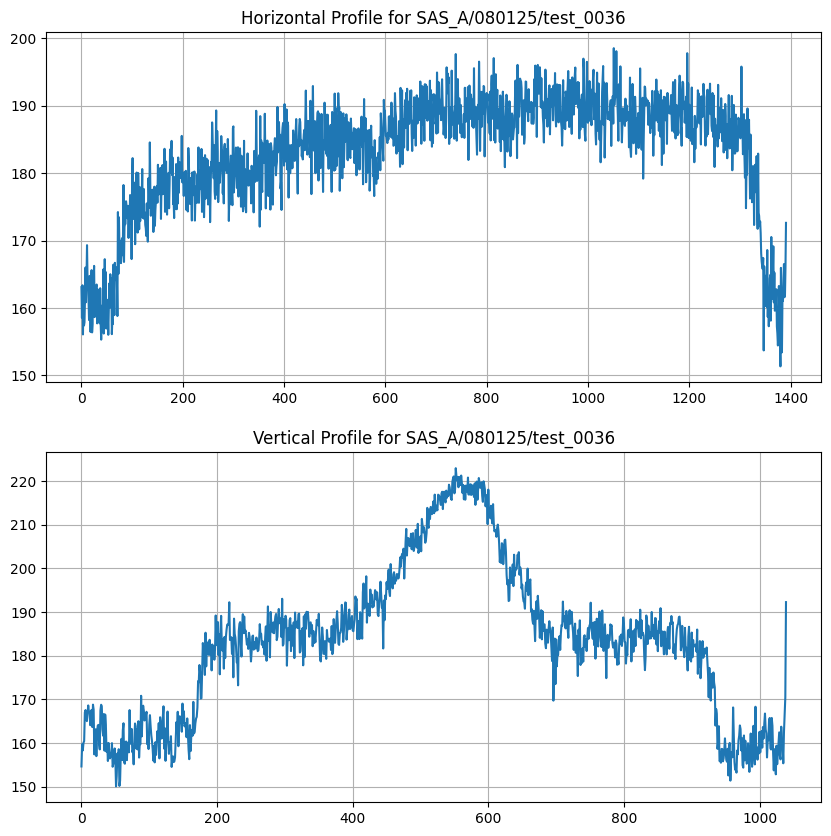

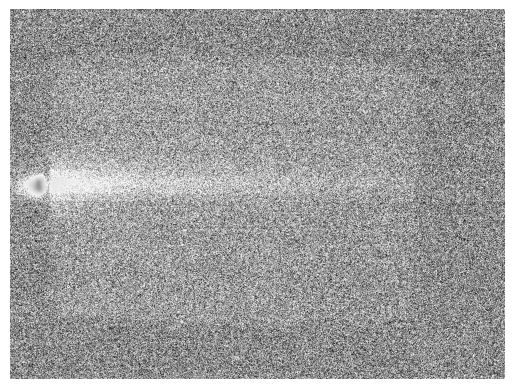

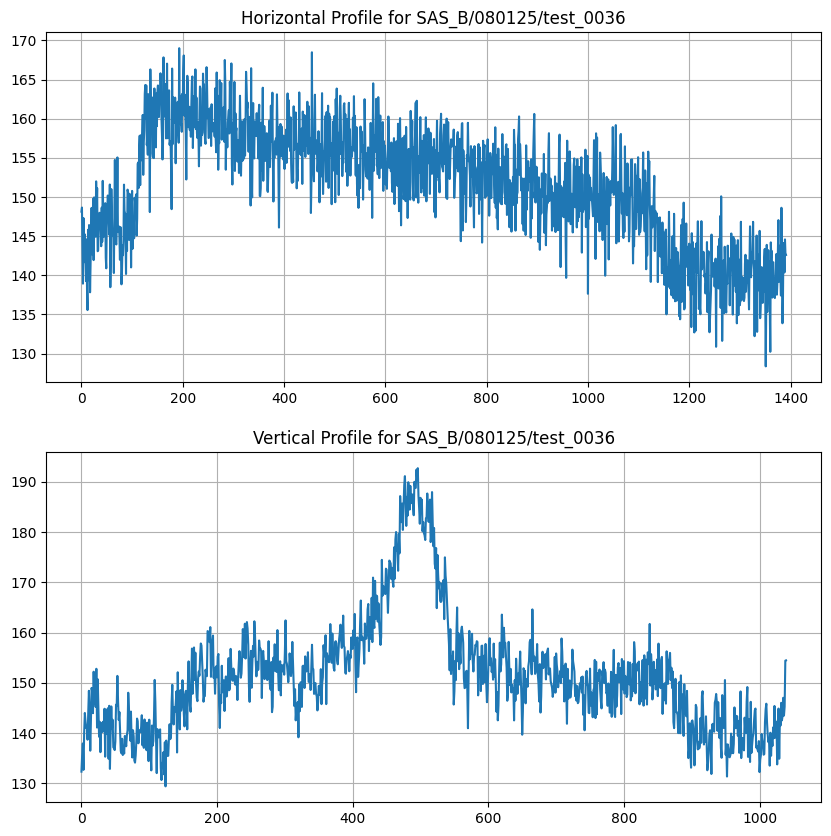

In [4]:
save_background_image('A', 40, 41, save_profiles=True)
save_background_image('B', 40, 41, save_profiles=True)

save_background_image('A', 39, 42, save_profiles=True)
save_background_image('B', 39, 42, save_profiles=True)

#save_background_image('A', 38, 42, save_profiles=True)
save_background_image('B', 38, 42, save_profiles=True)

save_background_image('A', 37, 43, save_profiles=True)
save_background_image('B', 37, 43, save_profiles=True)

save_background_image('A', 36, 44, save_profiles=True)
save_background_image('B', 36, 44, save_profiles=True)